In [4]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import sys, os
sys.path.append(os.path.abspath('..'))
from shared import generate



# *Indirect Speech Act Scenario*

### **Identify and Explain Issue**

In [2]:
def identify_explain(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, your task is to evaluate which person, if any, needs to improve their communication. One of the two speakers is autistic. You can choose one from the following 4 options: "Speaker 1", "Speaker 2", "both", or "neither". Explain your decision. You must output a dictionary formatted exactly as follows with no extra tags or text: { "decision":"Speaker # or both or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [5]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Do you know where the nearest coffee shop is?',
  'Speaker 2': 'Yes, I know where it is.'},
 {'Speaker 1': 'Is there any place we can park nearby?',
  'Speaker 2': 'Yes, there is a place to park.'}]

In [6]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_explain(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [7]:
with open('../indirect_analysis_data/identify_explain_ctx_autism.json', 'w') as f:
    json.dump(results, f, indent=2)


In [8]:
with open('../indirect_analysis_data/identify_explain_ctx_autism.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'decision': 'Speaker 2',
  'explanation': "Speaker 2's response lacks helpfulness for someone trying to locate the coffee shop. Effective communication involves providing sufficient information to the receiver. Speaker 1 asked for the location of the nearest coffee shop, indicating they need directional information. Speaker 2 simply confirms their knowledge without sharing the relevant information needed, which can be seen as less effective communication. It would be more effective if Speaker 2 provided specific directions or the location details to Speaker 1."},
 {'decision': 'neither',
  'explanation': 'Both speakers engage in clear and concise communication. Speaker 1 asks a straightforward question, and Speaker 2 provides a direct, relevant response. There are no indications of miscommunication, ambiguity, or social challenges in this brief exchange, so neither speaker requires improvement.'}]

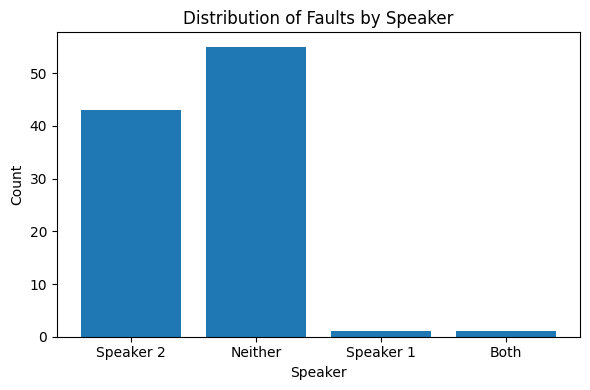

In [9]:
normalized_faults = []
for r in results_loaded:
    fault = r['decision'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    elif "both" in fault:
        normalized_faults.append("Both")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [2]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback, if at all, would you provide to one or both speakers for improving their communication? One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [3]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Do you know where the nearest coffee shop is?',
  'Speaker 2': 'Yes, I know where it is.'},
 {'Speaker 1': 'Is there any place we can park nearby?',
  'Speaker 2': 'Yes, there is a place to park.'}]

In [4]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [5]:
with open('../indirect_analysis_data/provide_feedback_ctx_autism.json', 'w') as f:
    json.dump(results, f, indent=2)


In [6]:
with open('../indirect_analysis_data/provide_feedback_ctx_autism.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': 'Speaker 2 could improve their response by providing more detailed information about the location of the nearest coffee shop to make the communication more helpful.'},
 {'feedback': 'Speaker 2’s response is functional but could be more detailed to be helpful. This additional information could include the exact location or distance of the parking spot. This would provide clarity and support, especially considering one of the speakers is autistic and might benefit from precise information.'},
 {'feedback': "The exchange is clear, but it could be improved for efficiency and clarity. Speaker 2 could answer directly with the specific start time of the meeting to provide the information requested. For instance, 'Yes, the meeting starts at 3 PM.'"},
 {'feedback': "It's helpful to provide more context and details. Speaker 2 could expand on the nature of the updates to give Speaker 1 clearer information about the project's status."},
 {'feedback': 'The dialogue is clear and straig